In [56]:
import pandas as pd

In [8]:
import pandas as pd
a=pd.read_csv('noisy_covid_data.csv')
a.head() 




,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,1486.0,NaN,50392.0,2022-05-07
1,France,New York,24762.0,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,27613.0,4875.0,18420.0,2021-07-20
3,United States,Florida,4196.0,2299.0,17202.0,2022-07-04
4,Russia,Moscow,NaN,3882.0,2394.0,2021-12-21


In [9]:
a.tail()

,Country,State,Confirmed,Deaths,Recovered,Date
995,United States,Moscow,60372.0,3497.0,4800.0,2020-11-17
996,India,Maharashtra,NaN,3860.0,3838.0,2022-09-01
997,Germany,California,54863.0,NaN,63101.0,2020-03-06
998,India,New York,90941.0,900.0,NaN,2022-04-22
999,France,Maharashtra,39737.0,2075.0,36782.0,2021-07-10


In [10]:
a.info

<bound method DataFrame.info of             Country        State  Confirmed  Deaths  Recovered        Date
0            Russia       Berlin     1486.0     NaN    50392.0  2022-05-07
1            France     New York    24762.0  2656.0    51021.0  2022-01-29
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0  2021-07-20
3     United States      Florida     4196.0  2299.0    17202.0  2022-07-04
4            Russia       Moscow        NaN  3882.0     2394.0  2021-12-21
..              ...          ...        ...     ...        ...         ...
995   United States       Moscow    60372.0  3497.0     4800.0  2020-11-17
996           India  Maharashtra        NaN  3860.0     3838.0  2022-09-01
997         Germany   California    54863.0     NaN    63101.0  2020-03-06
998           India     New York    90941.0   900.0        NaN  2022-04-22
999          France  Maharashtra    39737.0  2075.0    36782.0  2021-07-10

[1000 rows x 6 columns]>

In [11]:
a.dtypes

Country       object
State         object
Confirmed    float64
Deaths       float64
Recovered    float64
Date          object
dtype: object

In [12]:
print(a.isnull().sum().to_string())

Country        0
State          0
Confirmed    100
Deaths       100
Recovered    100
Date           0


In [13]:
a.describe()

,Confirmed,Deaths,Recovered
count,900.000000,900.000000,900.000000
mean,56043.782222,2490.523333,35400.577778
std,61621.220858,1429.540547,20600.337195
min,1002.000000,17.000000,536.000000
25%,25720.000000,1243.750000,17531.500000
50%,52682.000000,2524.500000,35093.000000
75%,77178.000000,3787.500000,54226.250000
max,865970.000000,4998.000000,69885.000000


In [14]:
#Handling missing value 
a[['Confirmed','Deaths','Recovered']]=a[['Confirmed','Deaths','Recovered']].fillna('0')
a


,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,1486.0,0,50392.0,2022-05-07
1,France,New York,24762.0,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,27613.0,4875.0,18420.0,2021-07-20
3,United States,Florida,4196.0,2299.0,17202.0,2022-07-04
4,Russia,Moscow,0,3882.0,2394.0,2021-12-21
...,...,...,...,...,...,...
995,United States,Moscow,60372.0,3497.0,4800.0,2020-11-17
996,India,Maharashtra,0,3860.0,3838.0,2022-09-01
997,Germany,California,54863.0,0,63101.0,2020-03-06
998,India,New York,90941.0,900.0,0,2022-04-22


In [19]:
#Converting colums from object type to numeric 
a[['Confirmed','Deaths','Recovered']]=a[['Confirmed','Deaths','Recovered']].apply(pd.to_numeric,errors='coerce')

In [20]:
#Assume any value greater than 50000 is an outlier 
#Replacing an outliner with mean value of Confirmed column
a['Confirmed']=a['Confirmed'].where(a['Confirmed']>50000,a['Confirmed'].mean())
a


,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,50439.404,0.0,50392.0,2022-05-07
1,France,New York,50439.404,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,50439.404,4875.0,18420.0,2021-07-20
3,United States,Florida,50439.404,2299.0,17202.0,2022-07-04
4,Russia,Moscow,50439.404,3882.0,2394.0,2021-12-21
...,...,...,...,...,...,...
995,United States,Moscow,60372.000,3497.0,4800.0,2020-11-17
996,India,Maharashtra,50439.404,3860.0,3838.0,2022-09-01
997,Germany,California,54863.000,0.0,63101.0,2020-03-06
998,India,New York,90941.000,900.0,0.0,2022-04-22


In [21]:
#usecase2 group data by country
#analyze the covid -19 sictuation at the country level aggregating the data to find the total coniformed cases,deaths,and recovered cases for each country.
total_confirmed=a.groupby('Country')['Confirmed'].sum()
total_deaths=a.groupby('Country')['Deaths'].sum()
total_recovered=a.groupby('Country')['Recovered'].sum()
print("Total Confirmed Cases in each country:",total_confirmed)
print("Total Death Cases in each country:",total_deaths)
print("Total Recovered Cases in each country:",total_deaths)

Total Confirmed Cases in each country: Country
Brazil            6671148.968
France            6496007.048
Germany           5913785.604
India             8949979.796
Italy             7063179.664
Mexico            7546764.452
Russia            6060912.008
Spain             5660185.140
United Kingdom    6455096.028
United States     5798743.220
Name: Confirmed, dtype: float64
Total Death Cases in each country: Country
Brazil            222424.0
France            223333.0
Germany           210541.0
India             257437.0
Italy             270143.0
Mexico            259871.0
Russia            200076.0
Spain             165317.0
United Kingdom    206574.0
United States     225755.0
Name: Deaths, dtype: float64
Total Recovered Cases in each country: Country
Brazil            222424.0
France            223333.0
Germany           210541.0
India             257437.0
Italy             270143.0
Mexico            259871.0
Russia            200076.0
Spain             165317.0
United Kingdom  

In [22]:
#identify the top 10 countries with the highest number of coniformed cases 
rank_countries_cases=a.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)
print(rank_countries_cases)
print(a.columns)


Country
India             8949979.796
Mexico            7546764.452
Italy             7063179.664
Brazil            6671148.968
France            6496007.048
United Kingdom    6455096.028
Russia            6060912.008
Germany           5913785.604
United States     5798743.220
Spain             5660185.140
Name: Confirmed, dtype: float64
Index(['Country', 'State', 'Confirmed', 'Deaths', 'Recovered', 'Date'], dtype='object')


In [23]:
#for each country calculate the fetility rate (deaths)(confirmed).
grouped=a.groupby('Country').agg({'Confirmed':'sum','Deaths':'sum'})
print(grouped)
grouped['Fatality_Rate']=grouped['Deaths']/grouped['Confirmed']
a=a.merge(grouped[['Fatality_Rate']],on='Country',how='left')
a


                  Confirmed    Deaths
Country                              
Brazil          6671148.968  222424.0
France          6496007.048  223333.0
Germany         5913785.604  210541.0
India           8949979.796  257437.0
Italy           7063179.664  270143.0
Mexico          7546764.452  259871.0
Russia          6060912.008  200076.0
Spain           5660185.140  165317.0
United Kingdom  6455096.028  206574.0
United States   5798743.220  225755.0


,Country,State,Confirmed,Deaths,Recovered,Date,Fatality_Rate
0,Russia,Berlin,50439.404,0.0,50392.0,2022-05-07,0.033011
1,France,New York,50439.404,2656.0,51021.0,2022-01-29,0.034380
2,United Kingdom,Karnataka,50439.404,4875.0,18420.0,2021-07-20,0.032002
3,United States,Florida,50439.404,2299.0,17202.0,2022-07-04,0.038932
4,Russia,Moscow,50439.404,3882.0,2394.0,2021-12-21,0.033011
...,...,...,...,...,...,...,...
995,United States,Moscow,60372.000,3497.0,4800.0,2020-11-17,0.038932
996,India,Maharashtra,50439.404,3860.0,3838.0,2022-09-01,0.028764
997,Germany,California,54863.000,0.0,63101.0,2020-03-06,0.035602
998,India,New York,90941.000,900.0,0.0,2022-04-22,0.028764


In [24]:
#usecase3 filter data by country 
#extract data for specific country ex:india.
print(a[a['Country']=='India'])
date=a.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
print(date)


    Country        State  Confirmed  Deaths  Recovered        Date  \
29    India        Texas  50439.404  1005.0    11344.0  2021-08-03   
30    India       London  50439.404  1197.0    51955.0  2022-08-27   
55    India     New York  88858.000  1084.0    49563.0  2021-09-28   
60    India       Moscow  51617.000  2643.0        0.0  2022-03-27   
66    India       Berlin  76271.000   510.0    19391.0  2021-02-05   
..      ...          ...        ...     ...        ...         ...   
972   India       Moscow  50439.404  4577.0    53300.0  2020-10-03   
975   India    Karnataka  89743.000     0.0    64815.0  2020-04-24   
986   India       London  75921.000  1990.0    15790.0  2022-09-08   
996   India  Maharashtra  50439.404  3860.0     3838.0  2022-09-01   
998   India     New York  90941.000   900.0        0.0  2022-04-22   

     Fatality_Rate  
29        0.028764  
30        0.028764  
55        0.028764  
60        0.028764  
66        0.028764  
..             ...  
972       0.

In [2]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl (217 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl (56 kB)
Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

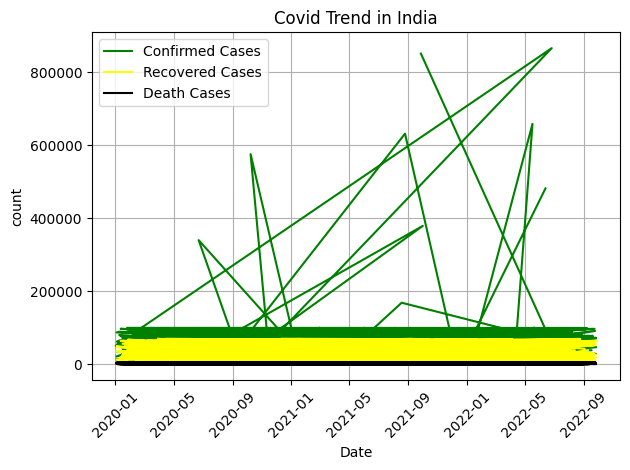

In [7]:
#Visualize Trends 
# Plot the trend of confirmed cases, deaths, and recoveries over time using a line plot.
#pip install matplotlib

import matplotlib.pyplot as plt
a=pd.read_csv('noisy_covid_data.csv')
a['Date']=pd.to_datetime(a['Date'])
plt.plot(a['Date'],a['Confirmed'],label='Confirmed Cases',color='green')
plt.plot(a['Date'],a['Recovered'],label='Recovered Cases',color='yellow')
plt.plot(a['Date'],a['Deaths'],label='Death Cases',color='black')

plt.title('Covid Trend in India')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

            Confirmed  Deaths  Recovered
Date                                    
2020-01-05    50777.0  3964.0        0.0
2020-01-12    97248.0  4425.0    64885.0
2020-01-19        0.0     0.0        0.0
2020-01-26    50395.0   244.0    49616.0
2020-02-02    11447.0  4381.0    45359.0
...               ...     ...        ...
2022-08-28    16401.0  1197.0    51955.0
2022-09-04   103252.0  8133.0    14902.0
2022-09-11    75921.0  1990.0    15790.0
2022-09-18        0.0     0.0        0.0
2022-09-25    75907.0  3775.0     7429.0

[143 rows x 3 columns]
            Confirmed  Deaths  Recovered  7_day_rolling_avg
Date                                                       
2020-01-05    50777.0  3964.0        0.0                NaN
2020-01-12    97248.0  4425.0    64885.0                NaN
2020-01-19        0.0     0.0        0.0                NaN
2020-01-26    50395.0   244.0    49616.0                NaN
2020-02-02    11447.0  4381.0    45359.0                NaN
...               ...  

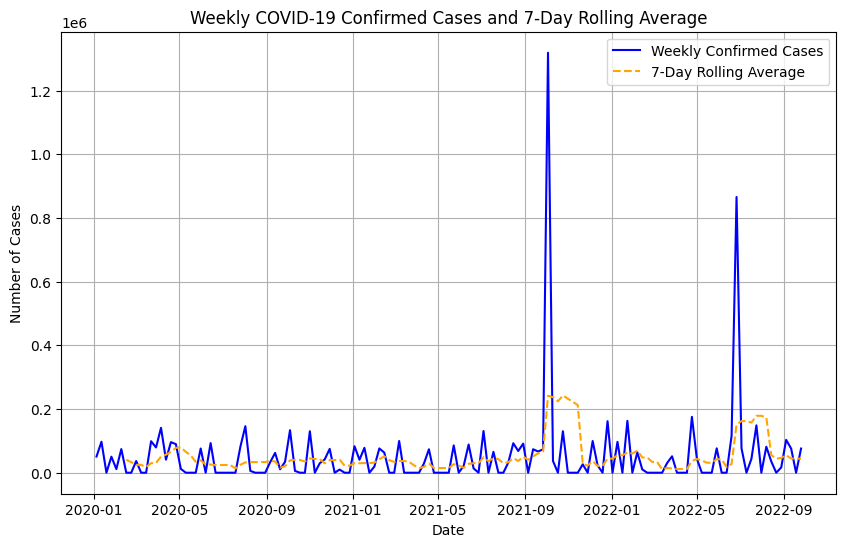

In [14]:
#usecase 4 time-series resampling and and rolling averages 
#resample the data : convert the daily data in to weekly aggregated data.
Data_india=a[a['Country']=='India']
Data_india.loc[:,'Date']=pd.to_datetime(Data_india['Date'])
group_date=Data_india.groupby('Date').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
weekly_data=group_date.resample('W').sum()
print(weekly_data)
weekly_data['7_day_rolling_avg'] = weekly_data['Confirmed'].rolling(window=7).mean()
print(weekly_data)
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Confirmed'], label='Weekly Confirmed Cases', color='blue')
plt.plot(weekly_data.index, weekly_data['7_day_rolling_avg'], label='7-Day Rolling Average', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Weekly COVID-19 Confirmed Cases and 7-Day Rolling Average')
plt.legend()
plt.grid(True)

plt.show()

In [17]:
#Use Case 5 Merging External Data1. Merge Population Data: Load external population data and merge it with the COVID-19 dataset.
population_data=pd.read_csv('population_data.csv')
merge_data=pd.merge(population_data,a,on='Country',how='inner')

In [18]:
#Calculate Cases per Capita: Compute confirmed cases per capita for each country.
merge_data['Cases per Capita']=(merge_data['Confirmed']/merge_data['Population'])*100000
print(merge_data)

           Country  Population      State  Confirmed  Deaths  Recovered  \
0    United States   331002651    Florida     4196.0  2299.0    17202.0   
1    United States   331002651     London    29225.0  4489.0    28159.0   
2    United States   331002651      Paris    95244.0  2191.0    33538.0   
3    United States   331002651  Karnataka    76257.0     NaN    18533.0   
4    United States   331002651      Texas    35470.0  2233.0    23957.0   
..             ...         ...        ...        ...     ...        ...   
995         Mexico   128932753   New York    13780.0  4889.0      943.0   
996         Mexico   128932753  Karnataka    35346.0  3176.0    68747.0   
997         Mexico   128932753     Berlin        NaN  2949.0        NaN   
998         Mexico   128932753     London     9080.0  2306.0    18540.0   
999         Mexico   128932753     London    96880.0  4929.0     3839.0   

          Date  Cases per Capita  
0   2022-07-04          1.267664  
1   2022-07-07          8.829

In [19]:
#rank countries by confirmed cases per capita 
rank_data=merge_data.sort_values(by='Cases per Capita', ascending=False)
print(rank_data[['Country','Population','Confirmed','Cases per Capita']].head(10))

            Country  Population  Confirmed  Cases per Capita
757           Spain    46754778   658570.0       1408.561923
669           Italy    60461826   631750.0       1044.874166
535  United Kingdom    67886011   340120.0        501.016329
919          Mexico   128932753   575650.0        446.473054
274          Brazil   212559417   481760.0        226.647216
763           Spain    46754778    99750.0        213.347179
746           Spain    46754778    99575.0        212.972886
740           Spain    46754778    99120.0        211.999723
762           Spain    46754778    98091.0        209.798879
734           Spain    46754778    97494.0        208.522004


In [32]:
#usecase 6 creating a final report 
# Summarize Key Metrics: For each country, calculate total confirmed cases, deaths, recoveries, and fatality 
a['Fatality_rate']=a['Deaths']/a['Confirmed']
print(a)
a.to_csv("krishnaprasanna_hashinclude.csv",index=False)

            Country        State  Confirmed  Deaths  Recovered       Date  \
0            Russia       Berlin     1486.0     NaN    50392.0 2022-05-07   
1            France     New York    24762.0  2656.0    51021.0 2022-01-29   
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0 2021-07-20   
3     United States      Florida     4196.0  2299.0    17202.0 2022-07-04   
4            Russia       Moscow        NaN  3882.0     2394.0 2021-12-21   
..              ...          ...        ...     ...        ...        ...   
995   United States       Moscow    60372.0  3497.0     4800.0 2020-11-17   
996           India  Maharashtra        NaN  3860.0     3838.0 2022-09-01   
997         Germany   California    54863.0     NaN    63101.0 2020-03-06   
998           India     New York    90941.0   900.0        NaN 2022-04-22   
999          France  Maharashtra    39737.0  2075.0    36782.0 2021-07-10   

     Fatality_rate  
0              NaN  
1         0.107261  
2         0.